In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os.path
from pandas_ods_reader import read_ods

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
fighter_sheet = "raw_fighter_details"
fight_sheet = "raw_total_fight_data"

fighters_ods = "input/raw_fighter_details.ods"
fights_ods = "input/raw_total_fight_data.ods"

In [3]:
fights_data = read_ods(fights_ods, fight_sheet)
fighters_data = read_ods(fighters_ods, fighter_sheet)

In [4]:
fighters_data.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,None,None,None
1,AJ Matthews,"5' 11""",185 lbs.,None,None,None
2,AJ McKee,"5' 10""",145 lbs.,None,None,None
3,AJ Siscoe,"5' 7""",135 lbs.,None,None,None
4,Aalon Cruz,"6' 0""",145 lbs.,None,None,None


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [6]:
fights_data['R_SIG_STR_pct'] = fights_data['R_SIG_STR_pct'].str.strip('%').astype(float)
fights_data['B_SIG_STR_pct'] = fights_data['B_SIG_STR_pct'].str.strip('%').astype(float)
fights_data['R_TD_pct'] = fights_data['R_TD_pct'].str.strip('%').astype(float)
fights_data['B_TD_pct'] = fights_data['B_TD_pct'].str.strip('%').astype(float)

In [7]:
fights_data['R_SIG_STR_pct'] = fights_data['R_SIG_STR_pct']/100
fights_data['B_SIG_STR_pct'] = fights_data['B_SIG_STR_pct']/100
fights_data['R_TD_pct'] = fights_data['R_TD_pct']/100
fights_data['B_TD_pct'] = fights_data['B_TD_pct']/100


In [8]:
newfights_data = fights_data.drop(["R_TOTAL_STR.", "B_TOTAL_STR.", "R_TD", "B_TD"], axis=1)
newfights_data.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0.0,0.0,90 of 171,57 of 119,0.52,0.47,0.25,0.00,1.0,0.0,1.0,0.0,0.0,0.0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3.0,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1.0,0.0,8 of 11,2 of 12,0.72,0.16,1.00,0.00,1.0,0.0,3.0,0.0,0.0,0.0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2.0,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0.0,0.0,104 of 200,68 of 185,0.52,0.36,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2.0,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0.0,2.0,73 of 192,56 of 189,0.38,0.29,0.00,0.33,0.0,0.0,0.0,1.0,0.0,0.0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0.0,1.0,64 of 144,73 of 123,0.44,0.59,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [9]:
significant = newfights_data[['R_HEAD','B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_CLINCH','B_CLINCH','R_GROUND','B_GROUND']]
sig_col = significant.columns
sig_df = pd.DataFrame()

for col in sig_col:
    sig_series = significant[col].str.split(' of ', expand = True)
    sig_df[col] = sig_series[0].astype(float)/sig_series[1].astype(float)

sig_df = sig_df.fillna(0)
sig_df.head()

,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND
0,0.486667,0.393258,0.812500,0.875000,0.800000,0.681818,0.826087,1.000000,0.866667,1.0
1,0.800000,0.000000,0.666667,0.000000,0.000000,0.666667,1.000000,0.000000,1.000000,0.0
2,0.451389,0.282895,0.675676,0.652174,0.736842,1.000000,0.500000,0.000000,0.000000,0.0
3,0.289655,0.240964,0.625000,0.684211,0.695652,0.750000,0.600000,0.833333,1.000000,0.4
4,0.342105,0.570175,0.857143,0.875000,0.826087,1.000000,0.777778,0.833333,0.000000,1.0


In [10]:
temp_df1 = fights_data['R_TOTAL_STR.'].str.split(' of ', expand = True)
temp_df1['R_TOTAL_STR.'] = temp_df1[0].astype(float)/temp_df1[1].astype(float)

temp_df2 = fights_data['B_TOTAL_STR.'].str.split(' of ', expand = True)
temp_df2['B_TOTAL_STR.'] = temp_df2[0].astype(float)/temp_df2[1].astype(float)

temp_df3 = fights_data['R_TD'].str.split(' of ', expand = True)
temp_df3['R_TD'] = temp_df3[0].astype(float)/temp_df3[1].astype(float)

temp_df4 = fights_data['B_TD'].str.split(' of ', expand = True)
temp_df4['B_TD'] = temp_df3[0].astype(float)/temp_df3[1].astype(float)

In [11]:
newtemp_df1 = temp_df1.drop([0, 1], axis=1)
newtemp_df2 = temp_df2.drop([0, 1], axis=1)
newtemp_df3 = temp_df3.drop([0, 1], axis=1)
newtemp_df4 = temp_df4.drop([0, 1], axis=1)

In [12]:
df69 = newfights_data.join(newtemp_df1)
df70 = df69.join(newtemp_df2)
df71 = df70.join(newtemp_df3)
df72 = df71.join(newtemp_df4)
df72['new_column'] = np.where(df72['R_fighter'] == df72['Winner'], '0', '1')

In [13]:
df72 = df72.fillna(0).drop(['R_HEAD','B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_CLINCH','B_CLINCH','R_GROUND','B_GROUND'],axis=1)

In [14]:
df73 = df72.join(sig_df)
df73.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_DISTANCE,B_DISTANCE,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,new_column,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND
0,Henry Cejudo,Marlon Moraes,0.0,0.0,90 of 171,57 of 119,0.52,0.47,0.25,0.00,1.0,0.0,1.0,0.0,0.0,0.0,45 of 118,54 of 116,KO/TKO,3.0,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,0.543956,0.487603,0.25,0.25,0,0.486667,0.393258,0.812500,0.875000,0.800000,0.681818,0.826087,1.000000,0.866667,1.0
1,Valentina Shevchenko,Jessica Eye,1.0,0.0,8 of 11,2 of 12,0.72,0.16,1.00,0.00,1.0,0.0,3.0,0.0,0.0,0.0,5 of 8,2 of 12,KO/TKO,2.0,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko,0.925000,0.807692,1.00,1.00,0,0.800000,0.000000,0.666667,0.000000,0.000000,0.666667,1.000000,0.000000,1.000000,0.0
2,Tony Ferguson,Donald Cerrone,0.0,0.0,104 of 200,68 of 185,0.52,0.36,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,103 of 198,68 of 184,TKO - Doctor's Stoppage,2.0,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson,0.520000,0.367568,0.00,0.00,0,0.451389,0.282895,0.675676,0.652174,0.736842,1.000000,0.500000,0.000000,0.000000,0.0
3,Jimmie Rivera,Petr Yan,0.0,2.0,73 of 192,56 of 189,0.38,0.29,0.00,0.33,0.0,0.0,0.0,1.0,0.0,0.0,60 of 173,42 of 167,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan,0.389744,0.302083,0.00,0.00,1,0.289655,0.240964,0.625000,0.684211,0.695652,0.750000,0.600000,0.833333,1.000000,0.4
4,Tai Tuivasa,Blagoy Ivanov,0.0,1.0,64 of 144,73 of 123,0.44,0.59,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,50 of 126,62 of 111,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov,0.452055,0.618321,0.00,0.00,1,0.342105,0.570175,0.857143,0.875000,0.826087,1.000000,0.777778,0.833333,0.000000,1.0


In [15]:
R_fighter_data = "input/R_raw_fighter_details.csv"
R_fighter_df = pd.read_csv(R_fighter_data)
R_fighter_df_renamed = R_fighter_df.rename(columns={"fighter_name":"R_fighter", "Height":"R_Height", "Weight":"R_Weight", "Reach":"R_Reach", "Stance":"R_Stance", "DOB":"R_DOB"})
R_fighter_df_renamed.head()

,R_fighter,R_Height,R_Weight,R_Reach,R_Stance,R_DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [16]:
B_fighter_data = "input/B_raw_fighter_details.csv"
B_fighter_df = pd.read_csv(B_fighter_data)
B_fighter_df_renamed = B_fighter_df.rename(columns={"fighter_name":"B_fighter", "Height":"B_Height", "Weight":"B_Weight", "Reach":"B_Reach", "Stance":"B_Stance", "DOB":"B_DOB"})
B_fighter_df_renamed.head()

,B_fighter,B_Height,B_Weight,B_Reach,B_Stance,B_DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [17]:
df73_B = pd.merge(df73, B_fighter_df_renamed, on="B_fighter")
df73_B.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_DISTANCE,B_DISTANCE,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,new_column,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,B_Height,B_Weight,B_Reach,B_Stance,B_DOB
0,Henry Cejudo,Marlon Moraes,0.0,0.0,90 of 171,57 of 119,0.52,0.47,0.25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,45 of 118,54 of 116,KO/TKO,3.0,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,0.543956,0.487603,0.25,0.25,0,0.486667,0.393258,0.812500,0.875000,0.800000,0.681818,0.826087,1.0,0.866667,1.000000,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
1,Raphael Assuncao,Marlon Moraes,0.0,1.0,2 of 12,10 of 23,0.16,0.43,0.00,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2 of 12,7 of 18,Submission,1.0,3:17,5 Rnd (5-5-5-5-5),Jason Herzog,"February 02, 2019","Fortaleza, Ceara, Brazil",Bantamweight Bout,Marlon Moraes,0.230769,0.480000,0.00,0.00,1,0.100000,0.470588,0.000000,0.000000,0.500000,0.500000,0.000000,0.0,0.000000,0.600000,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
2,Jimmie Rivera,Marlon Moraes,0.0,1.0,0 of 3,7 of 9,0.00,0.77,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 of 3,2 of 3,KO/TKO,1.0,0:33,5 Rnd (5-5-5-5-5),Dan Miragliotta,"June 01, 2018","Utica, New York, USA",Bantamweight Bout,Marlon Moraes,0.000000,0.777778,0.00,0.00,1,0.000000,0.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.833333,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
3,John Dodson,Marlon Moraes,1.0,0.0,43 of 105,45 of 131,0.40,0.34,0.50,0.5,0.0,1.0,0.0,0.0,0.0,0.0,40 of 101,45 of 131,Decision - Split,3.0,5:00,3 Rnd (5-5-5),Bill Bookwalter,"November 11, 2017","Norfolk, Virginia, USA",Bantamweight Bout,Marlon Moraes,0.431193,0.343511,0.50,0.50,1,0.289157,0.228261,0.833333,0.652174,1.000000,0.562500,0.666667,0.0,1.000000,0.000000,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
4,Raphael Assuncao,Marlon Moraes,0.0,0.0,43 of 134,44 of 150,0.32,0.29,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42 of 132,44 of 149,Decision - Split,3.0,5:00,3 Rnd (5-5-5),Osiris Maia,"June 03, 2017","Rio de Janeiro, Rio de Janeiro, Brazil",Bantamweight Bout,Raphael Assuncao,0.320896,0.293333,0.00,0.00,0,0.221053,0.132743,0.307692,0.700000,0.692308,0.882353,0.500000,0.0,0.000000,0.000000,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"


In [18]:
df73_B_R = pd.merge(df73_B, R_fighter_df_renamed, on="R_fighter")
df73_B_R_na = df73_B_R.dropna()

In [19]:
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("' ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_

inches_to_num = df73_B_R_na["R_Height"].apply(lambda x: parse_ht(x))


In [20]:
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("' ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_
inches_to_num_B = df73_B_R_na["B_Height"].apply(lambda x: parse_ht(x))
inches_to_num_B

0       66.0
1       66.0
2       66.0
3       64.0
4       66.0
        ... 
4896    71.0
4903    68.0
4904    68.0
4905    73.0
4906    75.0
Name: B_Height, Length: 4178, dtype: float64

In [21]:
# create date object using to_datetime() function
B_DOB_num = list(pd.to_datetime(df73_B_R_na["B_DOB"]))
R_DOB_num = list(pd.to_datetime(df73_B_R_na["R_DOB"]))
fight_date = list(pd.to_datetime(df73_B_R_na["date"]))

In [22]:
from datetime import timedelta, date

# Difference between two dates
# delta_B = (fight_date - B_DOB_num)
# delta_R = (fight_date - R_DOB_num)

from dateutil.relativedelta import relativedelta
#print(len(fight_date))
difference_in_years_B = [relativedelta(fight_date[i], B_DOB_num[i]).years for i in range(len(fight_date))]  
difference_in_years_R = [relativedelta(fight_date[i], R_DOB_num[i]).years for i in range(len(fight_date))]  

#difference_in_years = relativedelta(fight_date, B_DOB_num).years
#for fight_dates in fight_date

In [23]:
fight_date[36]

Timestamp('2018-12-08 00:00:00')

In [24]:
df73_B_R_na['R_Height'] = inches_to_num
df73_B_R_na['B_Height'] = inches_to_num_B
df73_B_R_na['date'] = fight_date
df73_B_R_na['B_age_at_fight'] = difference_in_years_B
df73_B_R_na['R_age_at_fight'] = difference_in_years_R

/home/quy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/quy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/quy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [25]:
df73_B_R_na['B_Weight(lbs)'] = df73_B_R_na['B_Weight'].str.strip('lbs.')
df73_B_R_na['R_Weight(lbs)'] = df73_B_R_na['R_Weight'].str.strip('lbs.')
df73_B_R_na['R_Reach (inches)'] = df73_B_R_na['R_Reach'].str.strip('"')
df73_B_R_na['B_Reach (inches)'] = df73_B_R_na['B_Reach'].str.strip('"')
all_fighters = df73_B_R_na
all_fighters.head()

/home/quy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/quy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/quy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_DISTANCE,B_DISTANCE,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,new_column,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,B_Height,B_Weight,B_Reach,B_Stance,B_DOB,R_Height,R_Weight,R_Reach,R_Stance,R_DOB,B_age_at_fight,R_age_at_fight,B_Weight(lbs),R_Weight(lbs),R_Reach (inches),B_Reach (inches)
0,Henry Cejudo,Marlon Moraes,0.0,0.0,90 of 171,57 of 119,0.52,0.47,0.25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,45 of 118,54 of 116,KO/TKO,3.0,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,2019-06-08,"Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,0.543956,0.487603,0.250000,0.250000,0,0.486667,0.393258,0.812500,0.875000,0.800000,0.681818,0.826087,1.000000,0.866667,1.00,66.0,135 lbs.,"67""",Orthodox,"Apr 26, 1988",64.0,135 lbs.,"64""",Orthodox,"Feb 09, 1987",31,32,135,135,64,67
1,Henry Cejudo,TJ Dillashaw,1.0,0.0,18 of 23,1 of 3,0.78,0.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3 of 6,1 of 3,KO/TKO,1.0,0:32,5 Rnd (5-5-5-5-5),Kevin MacDonald,2019-01-19,"Brooklyn, New York, USA",UFC Flyweight Title Bout,Henry Cejudo,0.782609,0.333333,0.000000,0.000000,0,0.772727,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.882353,0.00,66.0,125 lbs.,"67""",Orthodox,"Feb 07, 1986",64.0,135 lbs.,"64""",Orthodox,"Feb 09, 1987",32,31,125,135,64,67
2,Henry Cejudo,Sergio Pettis,0.0,0.0,36 of 83,25 of 98,0.43,0.25,0.60,0.0,0.0,0.0,3.0,0.0,0.0,0.0,16 of 56,23 of 93,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Keith Peterson,2017-12-02,"Detroit, Michigan, USA",Flyweight Bout,Henry Cejudo,0.574324,0.339286,0.600000,0.600000,0,0.295082,0.208791,0.769231,0.750000,0.888889,1.000000,1.000000,1.000000,0.708333,0.25,66.0,135 lbs.,"69""",Orthodox,"Aug 18, 1993",64.0,135 lbs.,"64""",Orthodox,"Feb 09, 1987",24,30,135,135,64,69
3,Henry Cejudo,Wilson Reis,1.0,0.0,34 of 58,5 of 25,0.58,0.20,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24 of 41,5 of 25,KO/TKO,2.0,0:25,3 Rnd (5-5-5),Jerin Valel,2017-09-09,"Edmonton, Alberta, Canada",Flyweight Bout,Henry Cejudo,0.609375,0.200000,1.000000,1.000000,0,0.510638,0.166667,0.875000,0.000000,1.000000,1.000000,0.666667,0.000000,0.571429,0.00,64.0,125 lbs.,"65""",Southpaw,"Jan 06, 1985",64.0,135 lbs.,"64""",Orthodox,"Feb 09, 1987",32,30,125,135,64,65
4,Henry Cejudo,Chico Camus,0.0,0.0,62 of 143,48 of 144,0.43,0.33,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47 of 115,38 of 126,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Mario Yamasaki,2015-06-13,"Mexico City, Distrito Federal, Mexico",Flyweight Bout,Henry Cejudo,0.607306,0.375796,0.066667,0.066667,0,0.348214,0.293233,0.724138,0.818182,1.000000,0.000000,0.576923,0.529412,0.000000,1.00,66.0,125 lbs.,"66""",Orthodox,"Jan 26, 1985",64.0,135 lbs.,"64""",Orthodox,"Feb 09, 1987",30,28,125,135,64,66


In [26]:
# womens = all_fighters[all_fighters.Fight_type.str.contains("Women's")]
# mens = all_fighters[~all_fighters.Fight_type.str.contains("Women's")]
current_fighters = pd.DataFrame({'R_KD':[2],'B_KD':[0],'R_HEAD':[0.4158],'R_TD':[0],'B_TD':[0],
           'B_HEAD':[0.3021],'R_BODY':[0.71622],'B_BODY':[0.71795],'R_LEG':[0.85714],'B_LEG':[0.8],'R_CLINCH':[1],
           'B_CLINCH':[0],'R_GROUND':[0.9333],'B_GROUND':[0],'R_SUB_ATT':[0],'B_SUB_ATT':[0],'R_Height':[72],'B_Height':[71],
           'B_age_at_fight':[31],'R_age_at_fight':[32],'R_Reach (inches)':[76],'B_Reach (inches)':[72]})
current_fighters
current_y = pd.DataFrame({'new_column':["0"]})

In [27]:
# Creating input feature
X = df72[['R_KD','B_KD','R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
                 'R_TD','B_TD','R_TD_pct','B_TD_pct','R_SUB_ATT','B_SUB_ATT','R_PASS','B_PASS','R_REV','B_REV']]

X2 = df73[['R_KD','B_KD','R_HEAD','R_TD','B_TD',
           'B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_CLINCH',
           'B_CLINCH','R_GROUND','B_GROUND','R_SUB_ATT','B_SUB_ATT']]

X3 = df73_B_R_na[['R_KD','B_KD','R_HEAD','R_TD','B_TD',
           'B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_CLINCH',
           'B_CLINCH','R_GROUND','B_GROUND','R_SUB_ATT','B_SUB_ATT','R_Height','B_Height',
           'B_age_at_fight','R_age_at_fight','R_Reach (inches)','B_Reach (inches)' ]]
X3_current = pd.concat([X3, current_fighters])

# Creating target variable
y = df72[['new_column']]
y2 = df73_B_R_na[['new_column']]
y2_current = pd.concat([y2,current_y],ignore_index=True)

#Creating Train and Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3_current, y2_current, test_size=0.3)

# #Normalizing the input features
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# X_train = sc_x.fit_transform(X_train)
# X_test = sc_x.transform(X_test)

# #Normalizing the target variable
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.transform(y_test)

# Creating the Logistic regressor
classifier = LogisticRegression()

# fitting the training data to the Logistic Regressor
classifier.fit(X_train,y_train)

# Checking the model coefficients
classifier.coef_

/home/quy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/quy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[-1.74538744,  1.05859749, -1.46071602, -0.64741552, -0.64741552,
         1.49438641, -0.37773846,  0.28953621, -0.44108407,  0.34815354,
        -0.18463198,  0.22435019, -0.74111457,  1.52627147, -0.52469117,
         0.35118858, -0.01737702, -0.01731598,  0.00436069,  0.06186037,
        -0.04441714,  0.04693874]])

In [28]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [29]:
classifier.fit(X_train, y_train)
test_results = classifier.predict(X_test)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

/home/quy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Data Score: 0.787008547008547
Testing Data Score: 0.7878787878787878


/home/quy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].values.tolist()}")

First 10 Predictions:   ['0' '0' '0' '0' '0' '0' '1' '1' '1' '0']
First 10 Actual labels: [['0'], ['1'], ['0'], ['0'], ['0'], ['0'], ['1'], ['0'], ['1'], ['0']]


In [31]:
accuracy = classifier.score(X_test, y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 78.78787878787878%


In [32]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test['new_column']}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
1249,0,1
1250,0,0
1251,0,0
1252,1,1


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(predictions, y_test)
print(confusion_matrix)

[[687 156]
 [110 301]]


[[687 156]
 [110 301]]


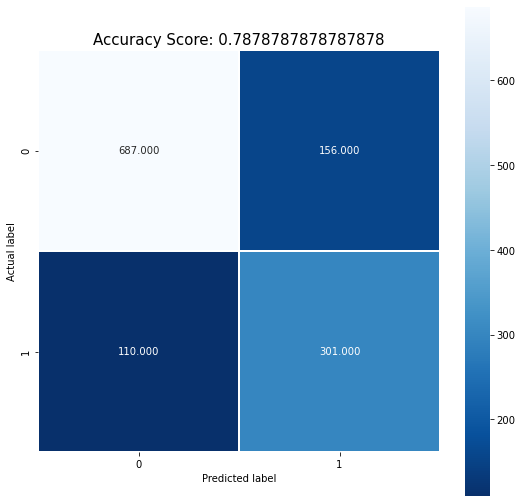

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

confusion_matrix = confusion_matrix(predictions, y_test)
print(confusion_matrix)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [35]:
R = df73_B_R_na.loc[:, ['R_KD','R_TD','R_HEAD','R_BODY','R_LEG','R_CLINCH','R_GROUND','R_SUB_ATT','R_Height','R_age_at_fight','R_Reach (inches)']]
B = df73_B_R_na.loc[:, ['B_KD','B_TD','B_HEAD','B_BODY','B_LEG','B_CLINCH','B_GROUND','B_SUB_ATT','B_Height','B_age_at_fight','B_Reach (inches)']]
B_COL = list(B.columns)
R_COL = list(R.columns)
R['R_Reach (inches)'] = R['R_Reach (inches)'].astype(float)
B['B_Reach (inches)'] = B['B_Reach (inches)'].astype(float)

In [36]:
diff_df_total = list(R.columns)
diff_df_cols = []
for string in diff_df_total:
    diff_df_cols.append(string.replace('R_','DIFF_'))

In [40]:
diff_df = pd.DataFrame(columns = [diff_df_cols])
for x in range (len(diff_df_cols)):
    diff_df = R[R_COL[x]] - B[B_COL[x]]

diff_train, diff_test, diff_y_train, diff_y_test = train_test_split(X3_current, y2_current, test_size=0.3)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [42]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=6,random_state=1)
random_forest.fit(diff_train,diff_y_train)

/home/quy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [43]:
diff_test_results = random_forest.predict(diff_test)
print(f"Training Data Score: {random_forest.score(diff_train, diff_y_train)}")
print(f"Testing Data Score: {random_forest.score(diff_test, diff_y_test)}")

Training Data Score: 0.8526495726495726
Testing Data Score: 0.803030303030303
